In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
import nltk
from multiprocessing import Pool
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
documents = pd.read_csv('../DATA/documents.csv')

In [3]:
documents

,INDEX,LINK,DOCUMENT
0,A107-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 107/21\n \n \nReferencia: Expediente T-...
1,A106-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 106/21\n \n \nReferencia: Expediente T-...
2,A092-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 092/21\n \n \nReferencia: respuesta a l...
3,A091-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 091/21\n \n \nReferencia: requerimiento...
4,A090-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 090/21\n \n \nReferencia: Expediente T-...
...,...,...,...
35416,C-416-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia No\n\r\n<!--\r\n /* Font Defi...
35417,C-221-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia de Constitucionalidad de Mayo...
35418,C-005-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\n \n\r\n<!--\r\n /* Font Definitions */\...
35419,C-004-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia Revisón de Constitucionalidad...


## Valores unicos

In [4]:
documents.INDEX.unique().size

34940

In [5]:
pd.concat(g for _, g in documents.groupby("INDEX") if len(g) > 1)

,INDEX,LINK,DOCUMENT
8465,A001-00,https://www.corteconstitucional.gov.co/Relator...,\n\n\nAuto 001/00\n\n\nAuto 001/00\n \nDEBIDO...
8466,A001-00,https://www.corteconstitucional.gov.co/Relator...,\n\n\nAuto 001/00\n\n\nAuto 001/00\n \nDEBIDO...
7556,A001-03,https://www.corteconstitucional.gov.co/Relator...,\n\n\nOCR Document\n\n\nAuto 001/03\n \nREFER...
7557,A001-03,https://www.corteconstitucional.gov.co/Relator...,\n\n\nOCR Document\n\n\nAuto 001/03\n \nREFER...
8929,A003-92,https://www.corteconstitucional.gov.co/Relator...,\n \nAUTO -003\nde marzo 3 de 1992\n \n \nDEMA...
...,...,...,...
19212,T-964-08,https://www.corteconstitucional.gov.co/Relator...,\n\n\nREPÚBLICA DE COLOMBIA\n\n\nSentencia T-...
29028,T-972-00,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-972/00\n\r\n<!--\r\n /* Fon...
29029,T-972-00,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-972/00\n\r\n<!--\r\n /* Fon...
16989,T-988-10,https://www.corteconstitucional.gov.co/Relator...,\nSentencia T-988/10\n \nLICENCIA DE MATERNIDA...


In [6]:
documents.drop_duplicates(subset ="INDEX",
                     keep = False, inplace = True)

In [7]:
documents

,INDEX,LINK,DOCUMENT
0,A107-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 107/21\n \n \nReferencia: Expediente T-...
1,A106-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 106/21\n \n \nReferencia: Expediente T-...
2,A092-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 092/21\n \n \nReferencia: respuesta a l...
3,A091-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 091/21\n \n \nReferencia: requerimiento...
4,A090-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 090/21\n \n \nReferencia: Expediente T-...
...,...,...,...
35415,C-417-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia No\n\r\n<!--\r\n /* Font Defi...
35416,C-416-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia No\n\r\n<!--\r\n /* Font Defi...
35417,C-221-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia de Constitucionalidad de Mayo...
35418,C-005-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\n \n\r\n<!--\r\n /* Font Definitions */\...


In [8]:
documents.INDEX.unique().size

34477

## Longitud de los documentos

In [9]:
documents["DOCUMENT_SIZE"] = [len(x) for x in documents.DOCUMENT]

In [10]:
documents

,INDEX,LINK,DOCUMENT,DOCUMENT_SIZE
0,A107-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 107/21\n \n \nReferencia: Expediente T-...,6691
1,A106-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 106/21\n \n \nReferencia: Expediente T-...,13992
2,A092-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 092/21\n \n \nReferencia: respuesta a l...,3314
3,A091-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 091/21\n \n \nReferencia: requerimiento...,3841
4,A090-21,https://www.corteconstitucional.gov.co/Relator...,\nAuto 090/21\n \n \nReferencia: Expediente T-...,18366
...,...,...,...,...
35415,C-417-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia No\n\r\n<!--\r\n /* Font Defi...,197452
35416,C-416-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia No\n\r\n<!--\r\n /* Font Defi...,460708
35417,C-221-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia de Constitucionalidad de Mayo...,369667
35418,C-005-92,https://www.corteconstitucional.gov.co/Relator...,\n\n\n \n\r\n<!--\r\n /* Font Definitions */\...,421565


Text(0, 0.5, 'Longitud en caracteres del documento')

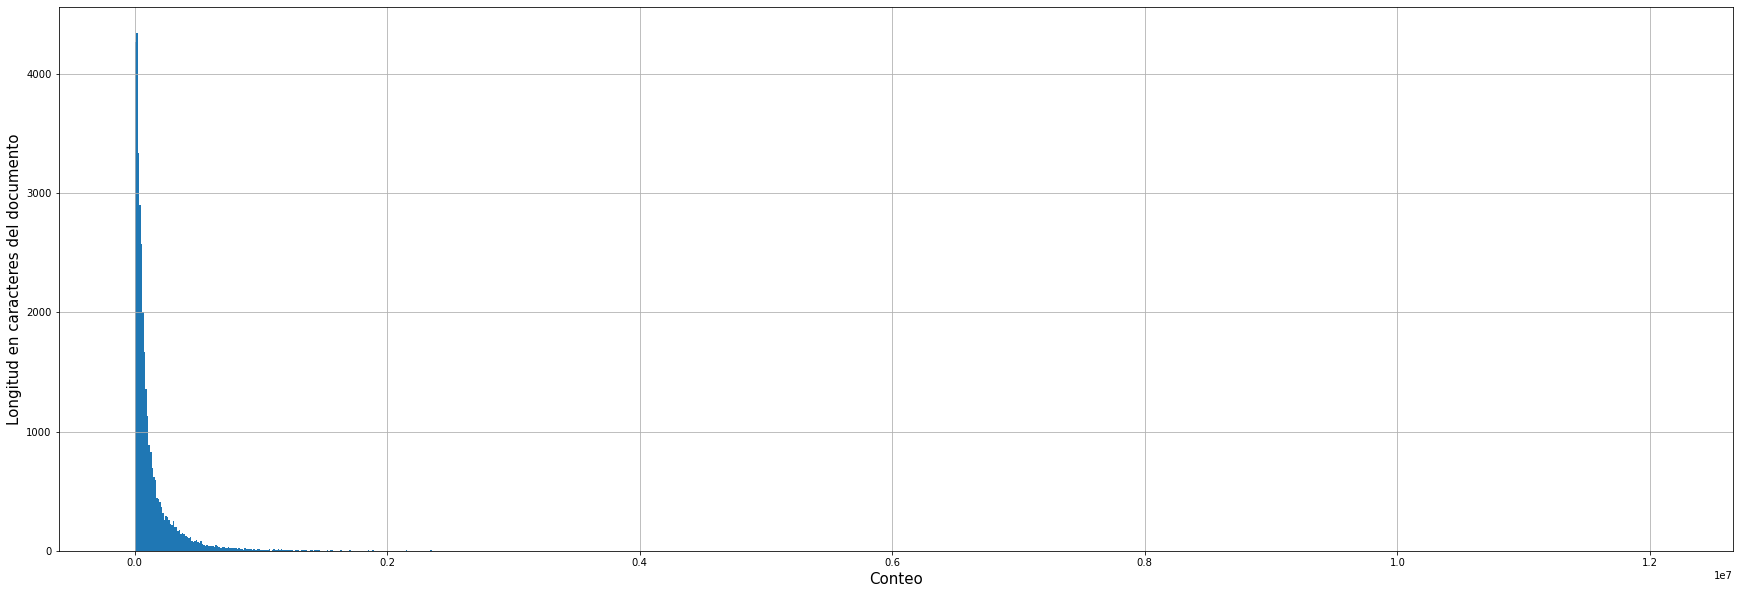

In [11]:
plt.figure(figsize=(30, 10))
documents['DOCUMENT_SIZE'].hist(bins=1000)
plt.xlabel("Conteo", fontsize=15)
plt.ylabel("Longitud en caracteres del documento",fontsize=15)


In [12]:
documents['DOCUMENT_SIZE'].iloc[documents["DOCUMENT_SIZE"].argmax()]

12052992

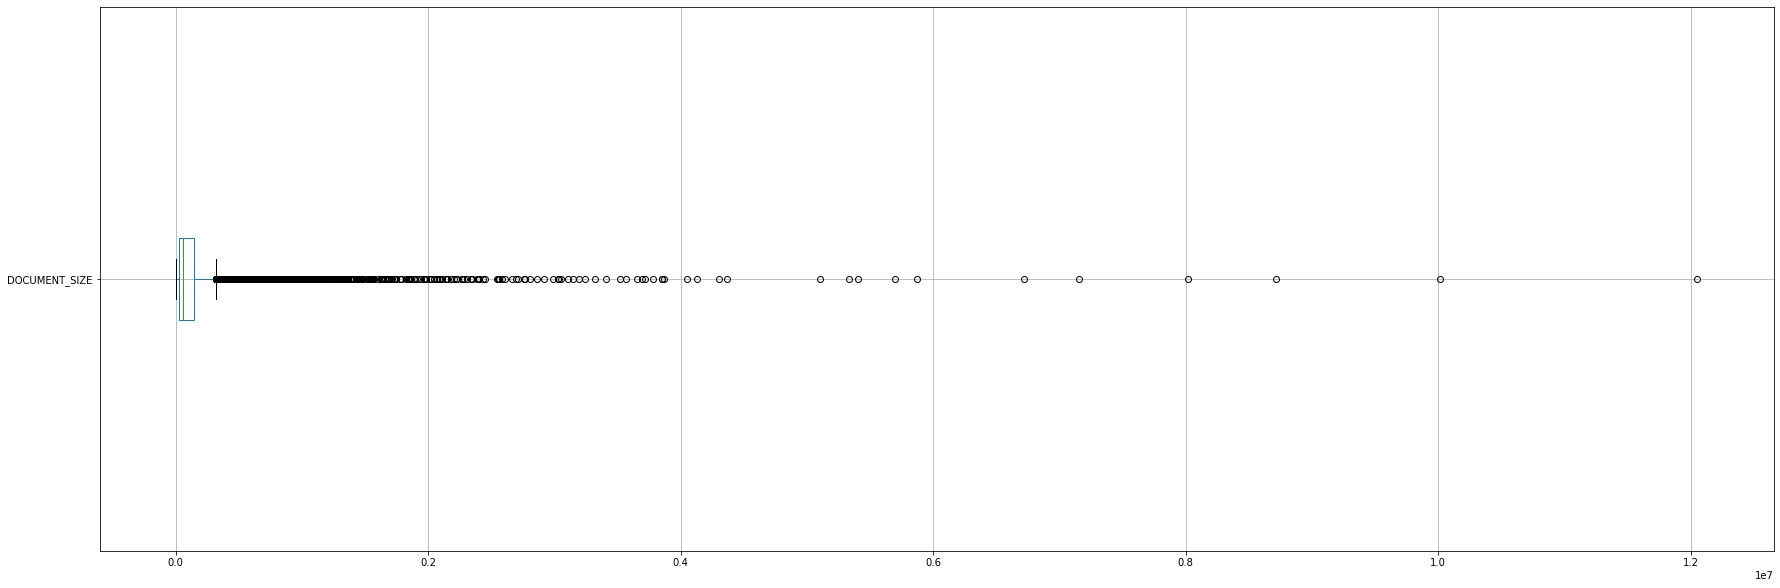

In [13]:
plt.figure(figsize=(30, 10))
boxplot = documents.boxplot(column=['DOCUMENT_SIZE'], vert=False)

In [14]:
outlier_documents = documents.loc[documents['DOCUMENT_SIZE'] > 100000].sort_values(by=['DOCUMENT_SIZE'])
outlier_documents

,INDEX,LINK,DOCUMENT,DOCUMENT_SIZE
9528,T-457-19,https://www.corteconstitucional.gov.co/Relator...,\nSentencia\r\nT-457/19\n \nDERECHO A LA EDUCA...,100024
11048,T-239-17,https://www.corteconstitucional.gov.co/Relator...,\nSentencia T-239/17\n \n \nCARENCIA\r\nACTUAL...,100029
10905,T-446-17,https://www.corteconstitucional.gov.co/Relator...,\nSentencia T-446/17\n \n \nRECONOCIMIENTO\r\n...,100031
26930,C-521-02,https://www.corteconstitucional.gov.co/Relator...,\n\n\nREPUBLICA DE COLOMBIA\n\r\n<!--\r\n /* ...,100039
30499,T-610-99,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-610/99\n\r\n<!--\r\n /* Fon...,100070
...,...,...,...,...
32228,T-330-97,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-330/97\n\r\n<!--\r\n /* Fon...,7152810
28910,T-1135-00,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-1135/00\n\r\n<!--\r\n /* Fo...,8019444
28715,T-1431-00,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-1431/00\n\r\n<!--\r\n /* Fo...,8713872
28652,T-1532-00,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-1532/00\n\r\n<!--\r\n /* Fo...,10012036


In [15]:
outlier_documents['LINK'].iloc[1410]

'https://www.corteconstitucional.gov.co/Relatoria/1997/T-643-97.htm'

In [16]:
outlier_documents['DOCUMENT'].iloc[1410]

' \n\n\nSentencia T-643/97\n\r\n<!--\r\n /* Font Definitions */\r\n @font-face\r\n\t{font-family:"Cambria Math";\r\n\tpanose-1:2 4 5 3 5 4 6 3 2 4;}\r\n /* Style Definitions */\r\n p.MsoNormal, li.MsoNormal, div.MsoNormal\r\n\t{margin:0cm;\r\n\tmargin-bottom:.0001pt;\r\n\ttext-autospace:none;\r\n\tfont-size:10.0pt;\r\n\tfont-family:"Times New Roman","serif";}\r\np.MsoBodyText, li.MsoBodyText, div.MsoBodyText\r\n\t{mso-style-link:"Texto independiente Car";\r\n\tmargin-top:0cm;\r\n\tmargin-right:0cm;\r\n\tmargin-bottom:6.0pt;\r\n\tmargin-left:0cm;\r\n\ttext-autospace:none;\r\n\tfont-size:14.0pt;\r\n\tfont-family:"Times New Roman","serif";\r\n\tfont-weight:bold;}\r\nspan.TextoindependienteCar\r\n\t{mso-style-name:"Texto independiente Car";\r\n\tmso-style-link:"Texto independiente";\r\n\tfont-family:"Times New Roman","serif";}\r\n.MsoChpDefault\r\n\t{font-size:11.0pt;}\r\n.MsoPapDefault\r\n\t{margin-bottom:10.0pt;\r\n\tline-height:115%;}\r\n@page Section1\r\n\t{size:612.0pt 936.0pt;\r\n\tm

In [17]:
test_text = outlier_documents['DOCUMENT'].iloc[-1]

In [18]:
test_result = test_text.replace("   ", "")

In [19]:
print(test_result[-100000:])


inter-ideograph'><i><span lang=ES-CO style='font-size:14.0pt;font-family:"Arial","sans-serif"'>&nbsp;</span></i></p>

<p class=MsoNormal style='margin-top:0cm;margin-right:16.75pt;margin-bottom:
0cm;margin-left:14.2pt;margin-bottom:.0001pt;text-align:justify;text-justify:
inter-ideograph'><i><span lang=ES-CO style='font-size:14.0pt;font-family:"Arial","sans-serif"'>“Por
último, la Corte se pregunta ¿cuál es el efecto jurídico de considerar que los
jurados de derecho son particulares que administran justicia?</span></i></p>

<p class=MsoNormal style='margin-top:0cm;margin-right:16.75pt;margin-bottom:
0cm;margin-left:14.2pt;margin-bottom:.0001pt;text-align:justify;text-justify:
inter-ideograph'><i><span lang=ES-CO style='font-size:14.0pt;font-family:"Arial","sans-serif"'>&nbsp;</span></i></p>

<p class=MsoNormal style='margin-top:0cm;margin-right:16.75pt;margin-bottom:
0cm;margin-left:14.2pt;margin-bottom:.0001pt;text-align:justify;text-justify:
inter-ideograph'><i><span lang=ES-CO styl

In [20]:
documents["DOCUMENT"] = [x.replace("   ", "") for x in tqdm(documents.DOCUMENT)]

100%|██████████| 34477/34477 [00:33<00:00, 1020.28it/s] 


In [21]:
outlier_documents = documents.loc[documents['DOCUMENT_SIZE'] > 100000].sort_values(by=['DOCUMENT_SIZE'])
outlier_documents

,INDEX,LINK,DOCUMENT,DOCUMENT_SIZE
9528,T-457-19,https://www.corteconstitucional.gov.co/Relator...,\nSentencia\r\nT-457/19\n \nDERECHO A LA EDUCA...,100024
11048,T-239-17,https://www.corteconstitucional.gov.co/Relator...,\nSentencia T-239/17\n \n \nCARENCIA\r\nACTUAL...,100029
10905,T-446-17,https://www.corteconstitucional.gov.co/Relator...,\nSentencia T-446/17\n \n \nRECONOCIMIENTO\r\n...,100031
26930,C-521-02,https://www.corteconstitucional.gov.co/Relator...,\n\n\nREPUBLICA DE COLOMBIA\n\r\n<!--\r\n /* ...,100039
30499,T-610-99,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-610/99\n\r\n<!--\r\n /* Fon...,100070
...,...,...,...,...
32228,T-330-97,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-330/97\n\r\n<!--\r\n /* Fon...,7152810
28910,T-1135-00,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-1135/00\n\r\n<!--\r\n /* Fo...,8019444
28715,T-1431-00,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-1431/00\n\r\n<!--\r\n /* Fo...,8713872
28652,T-1532-00,https://www.corteconstitucional.gov.co/Relator...,\n\n\nSentencia T-1532/00\n\r\n<!--\r\n /* Fo...,10012036


In [22]:
from bs4 import BeautifulSoup

def clean_text(text):
    """
    Limpiar textos de codigo residual
    """
    text = text.replace("p class", "<p class")
    text = text.replace("span la", "<span la")
    text = text.replace("i>span", "<i>span")
    text = text.replace("i>", "<i>")
    text = text.replace("/span", "</span")
    text = text.replace("span\r\nlang", "<span\r\nlang")
    text = text.replace("u>", "<u>")
    text = text.replace("span\r\n style", "<span\r\n style")
    
    soup = BeautifulSoup(text)
    text = soup.get_text()
    text = text.lower()
    
    text = text.replace("//p>", "")
    text = text.replace("/p>", "")
    text = text.replace("b>", "")
    text = text.replace("/b>", "")
    text = text.replace("/div>", "")
    text = text.replace("/body>", "")
    text = text.replace("/html>", "")
    text = text.replace("/", "")
    text = text.replace("<", "")
    text = text.replace(">", "")
    
    #text = re.sub("p class([\s\S]*)pt'>", "", text)
    #text = re.sub("/i([\s\S]*)>", "", text)
    
    return text

In [23]:
documents["DOCUMENT"] = [clean_text(x) for x in tqdm(documents.DOCUMENT)]

100%|██████████| 34477/34477 [08:07<00:00, 70.76it/s] 


In [24]:
documents["DOCUMENT_SIZE"] = [len(x) for x in documents.DOCUMENT]

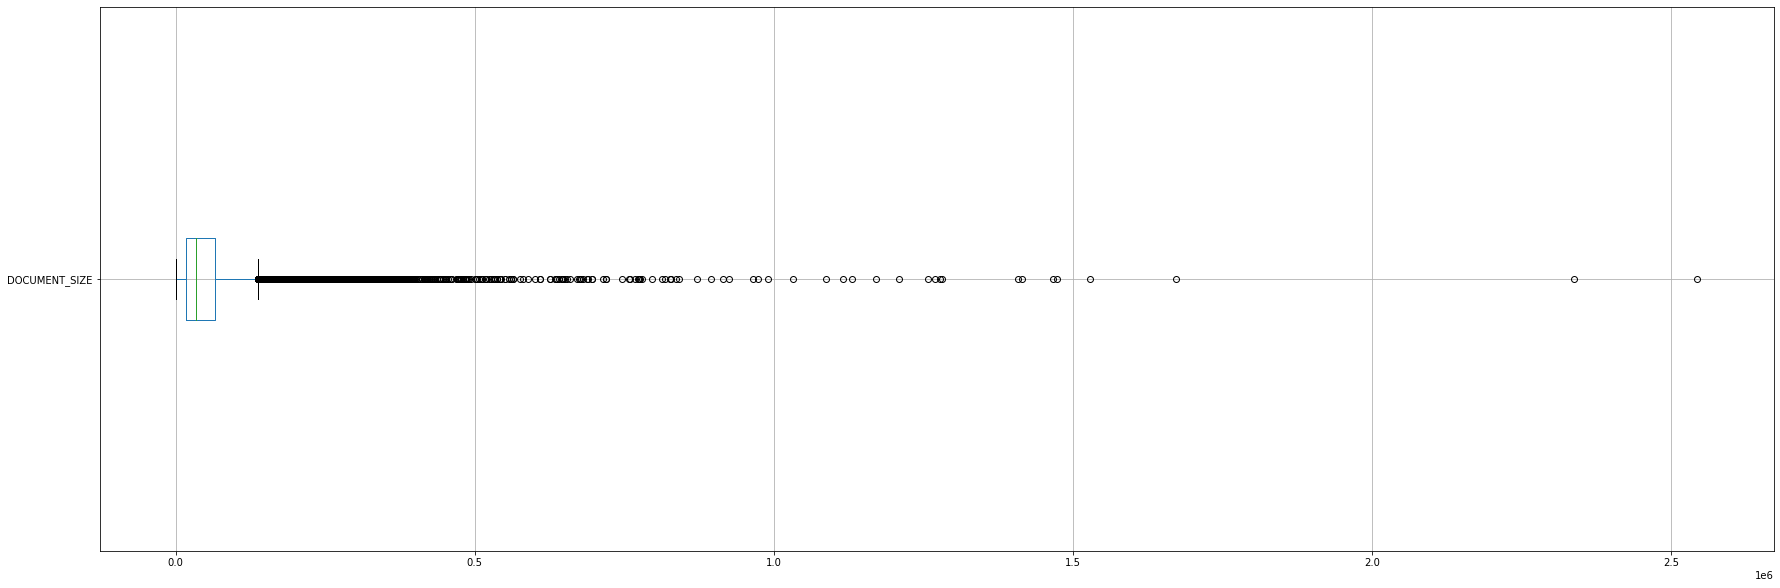

In [25]:
plt.figure(figsize=(30, 10))
boxplot = documents.boxplot(column=['DOCUMENT_SIZE'], vert=False)

In [29]:
documents['LINK'].iloc[documents["DOCUMENT_SIZE"].argmax()]

'https://www.corteconstitucional.gov.co/Relatoria/2018/C-080-18.htm'

In [28]:
print(documents['DOCUMENT'].iloc[documents["DOCUMENT_SIZE"].argmax()])

sentencia c-08018
 
instrumentos para facilitar y asegurar la implementacion y
desarrollo normativo del acuerdo final para la terminacion del conflicto y
construccion de una paz estable y duradera-procedimiento legislativo especial para la paz (fast
track)
 
proyecto de ley estatutaria de la administracion de
justicia en la jurisdiccion especial para la paz-control
automático de constitucionalidad
 
procedimiento legislativo especial para la paz-parámetros de forma y de trámite impuestos por el acto
legislativo 01 de 2016
 
procedimiento legislativo especial para la paz-requisitos de competencia en el proceso de formación
de las leyes estatutarias expedidas mediante dicho procedimiento
 
proyectos de ley y acto legislativo tramitados
mediante el procedimiento legislativo especial-exigencia de conexidad con el acuerdo final
 
proyecto de ley estatutaria de la administracion de
justicia en la jurisdiccion especial para la paz-regulación mediante ley estatutaria
 
el
mencionado proyecto d

In [30]:
documents.pop("DOCUMENT_SIZE")

0          6688
1         13987
2          3312
3          3838
4         18362
          ...  
35415     30308
35416     61819
35417     35538
35418     47209
35419    132662
Name: DOCUMENT_SIZE, Length: 34477, dtype: int64

In [31]:
documents

,INDEX,LINK,DOCUMENT
0,A107-21,https://www.corteconstitucional.gov.co/Relator...,auto 10721\n \n \nreferencia: expediente t-7.9...
1,A106-21,https://www.corteconstitucional.gov.co/Relator...,auto 10621\n \n \nreferencia: expediente t-6.8...
2,A092-21,https://www.corteconstitucional.gov.co/Relator...,auto 09221\n \n \nreferencia: respuesta a la s...
3,A091-21,https://www.corteconstitucional.gov.co/Relator...,auto 09121\n \n \nreferencia: requerimiento al...
4,A090-21,https://www.corteconstitucional.gov.co/Relator...,auto 09021\n \n \nreferencia: expediente t- 7....
...,...,...,...
35415,C-417-92,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia no. c-4179...
35416,C-416-92,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia no.\r\nc-4...
35417,C-221-92,https://www.corteconstitucional.gov.co/Relator...,sentencia de constitucionalidad de mayo 92\n\r...
35418,C-005-92,https://www.corteconstitucional.gov.co/Relator...,\nsentencia no.\r\nc-00592\n \n emergencia...


In [33]:
file_name = 'documents_V1.1.csv'
documents.to_csv(file_name, encoding='utf-8', index= False)